# Sales analysis<br>
This Notebook is a simple exploratary data analysis on the sales data from a electronics shop. We clean the the data a bit and then answer a few question related to the data.

Importing necessary libraries

In [44]:
import glob
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

The data is stored in "Sales_Data" folder with 12 files each containing the sales for a particular month <br>We will merge these 12 csvs into one DataFrame

In [96]:
path = './Sales_Data/'
csv_files = glob.glob(path + '/*.csv')

In [97]:
df = pd.concat(map(pd.read_csv, csv_files))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


##### Preprocessing

In [111]:
df.dropna(how='all', inplace=True)

In [112]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

Since we didn't remove header while reading the csv the headers are included in column values. Lets remove these

In [113]:
df.drop(df[df['Price Each'] == 'Price Each'].index,inplace = True)

In [114]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [115]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [116]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

While we are at it lets save this as a csv so we don't have to merge everytime.

In [119]:
df.to_csv('Sales_2019.csv',index=False)

Next time we can use the year sales data by simply running the below cell

In [2]:
df = pd.read_csv('./Sales_2019.csv',parse_dates=['Order Date'])

Lets start with some exploratory data analysis(EDA)

##### Q. Which month had the best sales? How much was earned in that month?

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99


In [4]:
df['Total Price'] = df['Price Each'] * df['Quantity Ordered']

In [5]:
#Checking the data type of the Order Date
type(df['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

As the values in the 'Order Date' column are str of format _MM/DD/YY mm:ss_ we can use string slicing to group by month by selecting the first to charachters

In [6]:
#df.groupby(by=df['Order Date'].str[:2])['Total Price'].sum()
df.groupby(df['Order Date'].dt.month)['Total Price'].sum()

Order Date
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Price, dtype: float64

We can see that december has the highest sales, but its kinda hard to understand how much more or how the sales vary so lets visualise it to make it more intuitive.

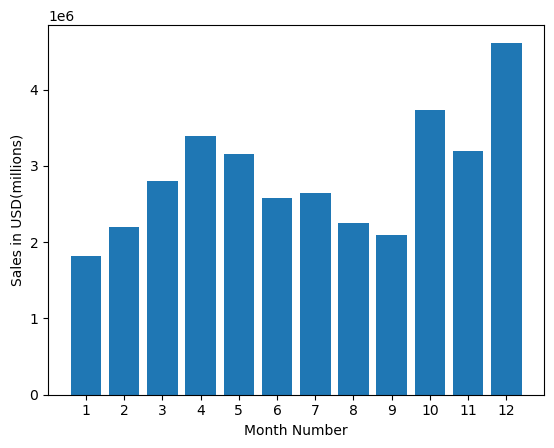

In [7]:
plt.bar(df.groupby(df['Order Date'].dt.month)['Total Price'].sum().index, df.groupby(df['Order Date'].dt.month)['Total Price'].sum())
plt.xticks(df.groupby(df['Order Date'].dt.month)['Total Price'].sum().index)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD(millions)')
plt.show()

##### Q. Which city had the highest number of sales?

Lets augment our data to make it easier to analyse it. We will create a new column called city and insert the correspoding value from the address column 

In [8]:
df['City'] = df.apply(lambda x: x['Purchase Address'].split(', ')[1] + ' ' + x['Purchase Address'].split(', ')[2][:2],axis=1)

Lets group by cit to find which city had the highest sales

In [9]:
df.groupby(['City'])['Total Price'].sum()

City
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: Total Price, dtype: float64

Make a bar plot to easily visualise the data

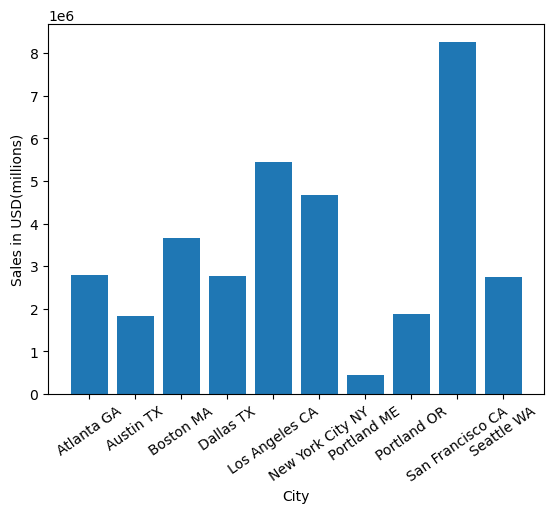

In [10]:
plt.bar(df.groupby(['City'])['Total Price'].sum().index, df.groupby(['City'])['Total Price'].sum())
plt.xticks(df.groupby(['City'])['Total Price'].sum().index, rotation = 35)
plt.xlabel('City')
plt.ylabel('Sales in USD(millions)')
plt.show()

##### Q. What time should we display ads to maximize likelihood of customers buying product?

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,New York City NY
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,Austin TX
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,Los Angeles CA
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,Seattle WA
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,Boston MA


Just like the previous task, let's augment the data to help with analysis. We will create another column called Time Ordered that will contain the hour at which it the order was ordered

In [12]:
df['Time Ordered'] = df['Order Date'].dt.hour

Group by time to find at which time the most products were ordered

In [13]:
df.groupby(['Time Ordered'])['Quantity Ordered'].sum()

Time Ordered
0      4428.0
1      2619.0
2      1398.0
3       928.0
4       937.0
5      1493.0
6      2810.0
7      4556.0
8      7002.0
9      9816.0
10    12308.0
11    14005.0
12    14202.0
13    13685.0
14    12362.0
15    11391.0
16    11662.0
17    12229.0
18    13802.0
19    14470.0
20    13768.0
21    12244.0
22     9899.0
23     7065.0
Name: Quantity Ordered, dtype: float64

Let's make a visualisation to better see the results

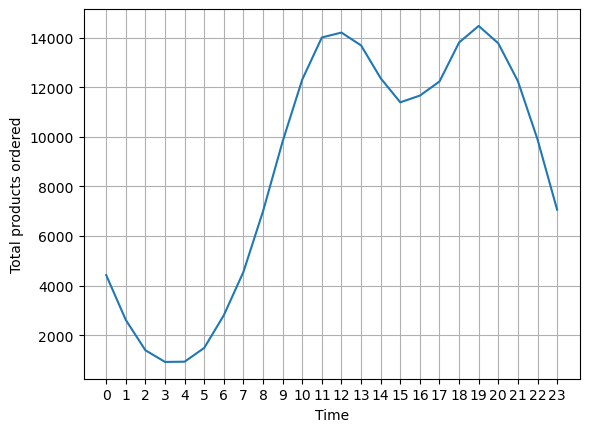

In [14]:
plt.plot(df.groupby(['Time Ordered'])['Quantity Ordered'].sum().index, df.groupby(['Time Ordered'])['Quantity Ordered'].sum())
plt.xlabel('Time')
plt.ylabel('Total products ordered')
plt.xticks(df.groupby(['Time Ordered'])['Quantity Ordered'].sum().index)
plt.grid()
plt.show()

It looks like the most orders were placed at around 12:00 and 19:00. So we can suggest showing ads around these times to increase sales

##### Q. What products are often sold together?

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,Time Ordered
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,New York City NY,9
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,Austin TX,10
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,Los Angeles CA,14
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,Seattle WA,22
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,Boston MA,13


In [45]:
def find_combs(series):
    dt={}
    for lst in series.map(lambda x: x.split(',')):
        for comb in combinations(lst,r=2):
            if comb in dt:
                dt[comb] += 1
            else:
                dt[comb] = 1
    return dt


In [48]:
s = df.groupby(['Order ID'])['Product'].apply(','.join)
counts = find_combs(s)
combs = pd.Series(counts)
combs

USB-C Charging Cable      Wired Headphones              160
Apple Airpods Headphones  AA Batteries (4-pack)          29
Vareebadd Phone           Wired Headphones              143
Google Phone              USB-C Charging Cable          987
                          Bose SoundSport Headphones    220
                                                       ... 
iPhone                    27in FHD Monitor                1
Macbook Pro Laptop        Flatscreen TV                   1
ThinkPad Laptop           Vareebadd Phone                 1
                          ThinkPad Laptop                 2
Google Phone              Flatscreen TV                   1
Length: 313, dtype: int64

In [51]:
combs.sort_values(ascending=False,inplace=True)

In [ ]:
plot_df = combs.head()
plot_df

In [59]:
index = [x for x in map(str,plot_df.index)]
index

["('iPhone', 'Lightning Charging Cable')",
 "('Google Phone', 'USB-C Charging Cable')",
 "('iPhone', 'Wired Headphones')",
 "('Google Phone', 'Wired Headphones')",
 "('Vareebadd Phone', 'USB-C Charging Cable')"]

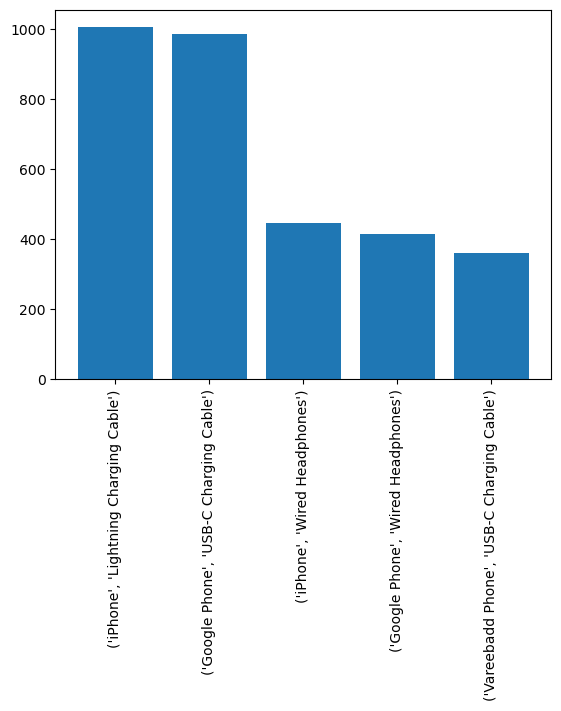

In [61]:
plt.bar(index,plot_df)
plt.xticks(rotation = 'vertical')
plt.show()

##### Q. Which product was ordered the most? Why do you think it sold the most?

In [62]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price,City,Time Ordered
0,278797,Wired Headphones,1.0,11.99,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11.99,New York City NY,9
1,278798,USB-C Charging Cable,2.0,11.95,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",23.90,Austin TX,10
2,278799,Apple Airpods Headphones,1.0,150.00,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",150.00,Los Angeles CA,14
3,278800,27in FHD Monitor,1.0,149.99,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",149.99,Seattle WA,22
4,278801,Bose SoundSport Headphones,1.0,99.99,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",99.99,Boston MA,13


Lets group by Products and add the units sold to get the total units sold for each product 

In [63]:
df.groupby(['Product'])['Quantity Ordered'].sum()

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

Make a graph to better visualise the data.

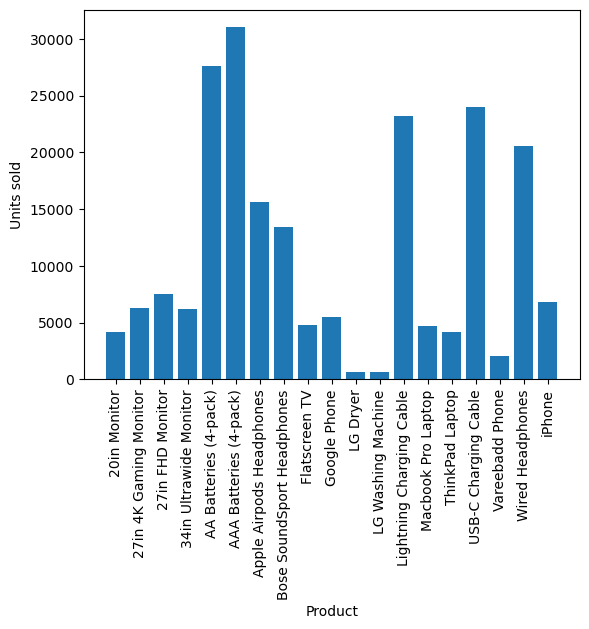

In [66]:
plt.bar(df.groupby(['Product'])['Quantity Ordered'].sum().index,df.groupby(['Product'])['Quantity Ordered'].sum())
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Units sold')
plt.show()

From the graph we can see that AAA batteries and AA batteries are the most sold products.

The reason why batteries are sold the most is probably beacause batteries are cheaper compared to other products also sold, we also see the 3rd and 4th most sold products are also somewhat cheap. To test our hypothesis lets overlay the units sold graph with the mean price of each product.

/tmp/ipykernel_5047/2365160510.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.groupby(['Product'])['Quantity Ordered'].sum().index,rotation='vertical')


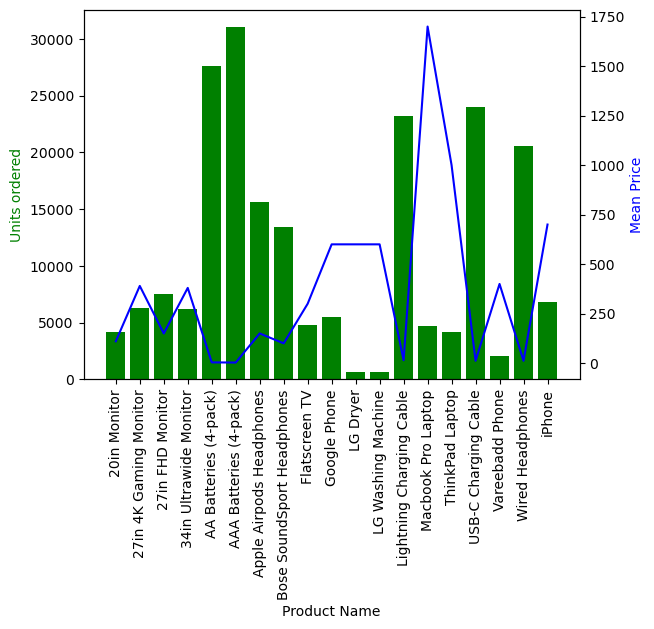

In [71]:
fig, ax = plt.subplots()
ax2= ax.twinx()
ax.bar(df.groupby(['Product'])['Quantity Ordered'].sum().index,df.groupby(['Product'])['Quantity Ordered'].sum(),color='g')
ax2.plot(df.groupby(['Product'])['Price Each'].mean().index,df.groupby(['Product'])['Price Each'].mean(),'b-')

ax.set_xlabel('Product Name')
ax.set_ylabel('Units ordered',color='g')
ax2.set_ylabel('Mean Price',color='b')
ax.set_xticklabels(df.groupby(['Product'])['Quantity Ordered'].sum().index,rotation='vertical')

plt.show()

As we see cheap products are sold more, therefore price could be the factor that determines how much a product is sold but that is not the only reason as we can see that costly products like laptops are sold more than dryer and washing machine that are comparitivly cheaper.